# **Part A: Installing Packages and Basic Visualization of ECG**

## **A1: Installing Packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
from os.path import join as osj

# Base folder in your Drive where you put the unzipped MIT-BIH files
PROJECT_PATH = "/content/drive/MyDrive/mit-bih-supraventricular-arrhythmia-database-1.0.0"     # <-- change folder name if yours is different
DATA_ROOT    = PROJECT_PATH    # the folder that contains 100.dat, 100.hea, etc.
os.makedirs(DATA_ROOT, exist_ok=True)

# Build the list of available record IDs (e.g., '100', '101', ...)
RECORDS = sorted({os.path.splitext(f)[0] for f in os.listdir(DATA_ROOT) if f.endswith(".dat")})

print("PROJECT_PATH:", PROJECT_PATH)
print("DATA_ROOT   :", DATA_ROOT)
print("Total records found:", len(RECORDS))
print("Sample:", RECORDS[:10])

PROJECT_PATH: /content/drive/MyDrive/mit-bih-supraventricular-arrhythmia-database-1.0.0
DATA_ROOT   : /content/drive/MyDrive/mit-bih-supraventricular-arrhythmia-database-1.0.0
Total records found: 78
Sample: ['800', '801', '802', '803', '804', '805', '806', '807', '808', '809']


In [ ]:
project_path = DATA_ROOT
patient_ids = RECORDS

In [ ]:
# wfdb is not normally installed in Colab
!pip install wfdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 142.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.3 which is incompatible.


In [ ]:
# Importing packages
import os
import datetime
import wfdb
import pywt
import seaborn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from os.path import join as osj
import pandas as pd

## **A2: Basic Visualization of ECG**
Basic code for loading (reading), plotting and playing with ECG signals

### **a. Getting Recordings' IDs**
The ECG recordings are named after Patients' IDs (from 100 to 234), sorted but not consecutive. Total 48 recordings.

In [ ]:
patient_ids = RECORDS
patient_ids

['800',
 '801',
 '802',
 '803',
 '804',
 '805',
 '806',
 '807',
 '808',
 '809',
 '810',
 '811',
 '812',
 '820',
 '821',
 '822',
 '823',
 '824',
 '825',
 '826',
 '827',
 '828',
 '829',
 '840',
 '841',
 '842',
 '843',
 '844',
 '845',
 '846',
 '847',
 '848',
 '849',
 '850',
 '851',
 '852',
 '853',
 '854',
 '855',
 '856',
 '857',
 '858',
 '859',
 '860',
 '861',
 '862',
 '863',
 '864',
 '865',
 '866',
 '867',
 '868',
 '869',
 '870',
 '871',
 '872',
 '873',
 '874',
 '875',
 '876',
 '877',
 '878',
 '879',
 '880',
 '881',
 '882',
 '883',
 '884',
 '885',
 '886',
 '887',
 '888',
 '889',
 '890',
 '891',
 '892',
 '893',
 '894']

### **b. 1 Patient ECG loading and plotting**
Extracting 2 leads ECG signals of a patient (for example: 100), and saving in two lists.

In [ ]:
#Extracting just 1 patient ECG signal and info
lead0 = {}  # without this it shows lead0[100] is not defined
lead1 = {}
patient_id = "800"
signals, info = wfdb.io.rdsamp(osj(DATA_ROOT, str(800)))
lead0[800] = signals[:, 0]
lead1[800] = signals[:, 1]

<class 'numpy.ndarray'>
(230400,)
{'fs': 128, 'sig_len': 230400, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['ECG1', 'ECG2'], 'comments': []}


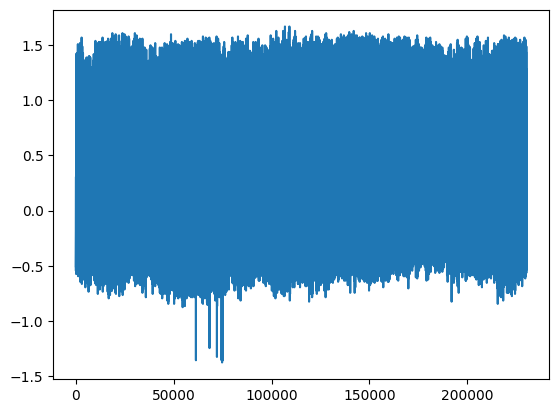

In [ ]:
# Visualization of 1 patients signal and info
print(type(lead0[800]))
print(lead0[800].shape)
plt.plot(lead0[800])
print(info)

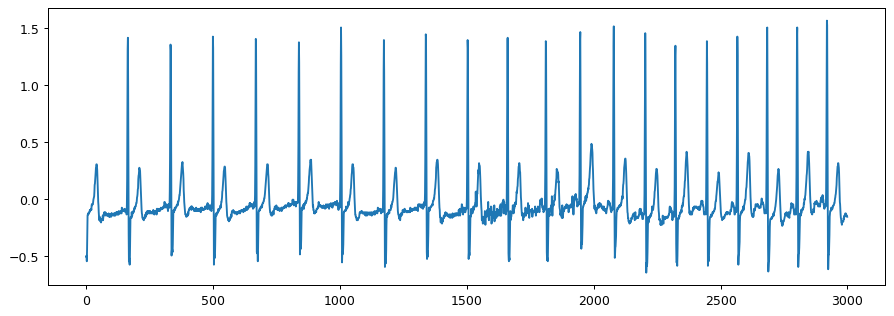

In [ ]:
# ECG signal per second
a = lead0[800][0: 3000]
plt.figure(figsize=(12, 4), dpi=90)
plt.plot(a)

### **c. All patients' ECG loading**

In [ ]:
# Loading all patients ECG SIGNALs using for loop
def get_ecg_signals(patient_ids):
    lead0 = {}
    lead1 = {}
    for id_ in patient_ids:
        signals, info = wfdb.io.rdsamp(osj(DATA_ROOT, str(id_)))
        lead0[id_] = signals[:, 0]
        lead1[id_] = signals[:, 1]
        print(f'Signal of patient {id_} extracted')
    return lead0, lead1

In [ ]:
# Loading all patient ECG INFORMATION
def get_ecg_info(patient_ids):
    _, info = wfdb.io.rdsamp(osj(DATA_ROOT, str(patient_ids)))
    resolution = 2**11  # Number of possible signal values we can have.
    info["resolution"] = 2**11
    return info

In [ ]:
lead0, lead1 = get_ecg_signals(patient_ids)

Signal of patient 800 extracted
Signal of patient 801 extracted
Signal of patient 802 extracted
Signal of patient 803 extracted
Signal of patient 804 extracted
Signal of patient 805 extracted
Signal of patient 806 extracted
Signal of patient 807 extracted
Signal of patient 808 extracted
Signal of patient 809 extracted
Signal of patient 810 extracted
Signal of patient 811 extracted
Signal of patient 812 extracted
Signal of patient 820 extracted
Signal of patient 821 extracted
Signal of patient 822 extracted
Signal of patient 823 extracted
Signal of patient 824 extracted
Signal of patient 825 extracted
Signal of patient 826 extracted
Signal of patient 827 extracted
Signal of patient 828 extracted
Signal of patient 829 extracted
Signal of patient 840 extracted
Signal of patient 841 extracted
Signal of patient 842 extracted
Signal of patient 843 extracted
Signal of patient 844 extracted
Signal of patient 845 extracted
Signal of patient 846 extracted
Signal of patient 847 extracted
Signal o

Text(0, 0.5, 'Amplitude (mV)')

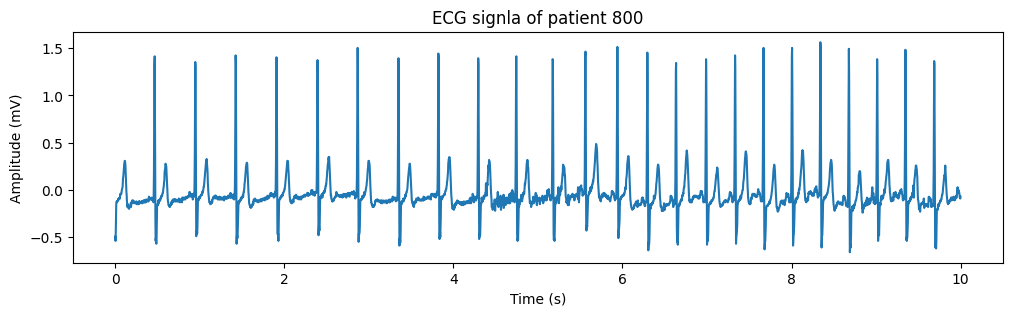

In [ ]:
# Plot any patient signal from any time frame
patient_id = "800" # can change
starting_time = 0 # can change
ending_time = 10 # can change

# Scaling
starting_signal_point = starting_time*350
ending_signal_point = ending_time*350 # As sampling frequency is 350 Hz
x = np.arange(starting_time, ending_time, 1/350)
signal = lead0[patient_id][starting_signal_point: ending_signal_point]

plt.figure(figsize=(12, 3), dpi=100)
plt.plot(x, signal)
plt.title(f'ECG signla of patient {patient_id}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (mV)')

In [ ]:
# ECG info of any patient
ecg_info = get_ecg_info(patient_ids[0])
ecg_info

{'fs': 128,
 'sig_len': 230400,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['ECG1', 'ECG2'],
 'comments': [],
 'resolution': 2048}

# **Part B: Denoising, R-Peak Detection, Segmentation**

### **B1: Denoising**
Noise removing by using Discrete Wavelet Transform (DCT)

In [ ]:
def denoise(data):
    coeffs = pywt.wavedec(data=data, wavelet='db5', level=6)   # was 9
    cA6, *details = coeffs
    threshold = (np.median(np.abs(details[-1])) / 0.6745) * np.sqrt(2 * np.log(len(details[-1])))
    for i in range(1, len(coeffs)-1):
        coeffs[i] = pywt.threshold(coeffs[i], threshold)
    rdata = pywt.waverec(coeffs, 'db5')
    return rdata

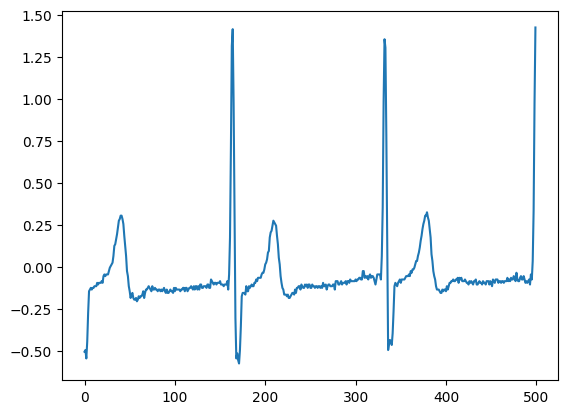

In [ ]:
# Ploting a signal before denoising
record = wfdb.rdrecord(project_path + '/' + '800', channel_names=['ECG1'])
data = record.p_signal.flatten()
plt.plot(data[0:500])

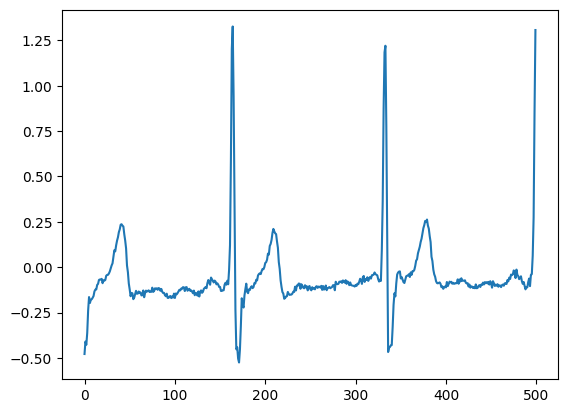

In [ ]:
# Same signal after denoising
rdata = denoise(data=data)
plt.plot(rdata[0:500])

### **B2: R-Peak Detection**
R-peak is annotated in MIT-BIH dataset. Just need to read the file.

In [ ]:
# For exmaple, we extract '100' recording annotation
annotation = wfdb.rdann(project_path + '/' + '800', 'atr')
Rlocation = annotation.sample
print(Rlocation)
Rclass = annotation.symbol
print(Rclass)

[   162    330    497 ... 230014 230153 230292]
['N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'S', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', '

In [ ]:
len(annotation.symbol)

1921

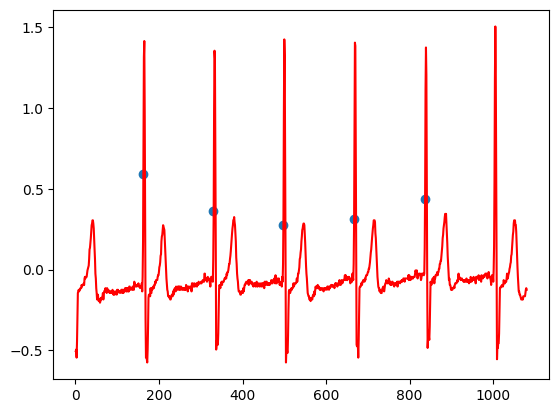

In [ ]:
# R-peak ploting
x = np.arange(1, 1081)

n_peak =5
r_peak_x = []
r_peak_y = []
for i in range(0, n_peak):
  r_peak_x.append(Rlocation[i])
  r_peak_y.append(rdata[Rlocation[i]])

plt.plot(x, data[0:1080], color='red')
plt.scatter(r_peak_x, r_peak_y)

### **B3: Segmentation**
Each ECG signal is segmented by using a window **length of 300**. From R-peak location, **99** samples taken from **left** and **201** samples from **right**. Thus a complete **heartbeat** is found.

(300,)
(300,)
(300,)


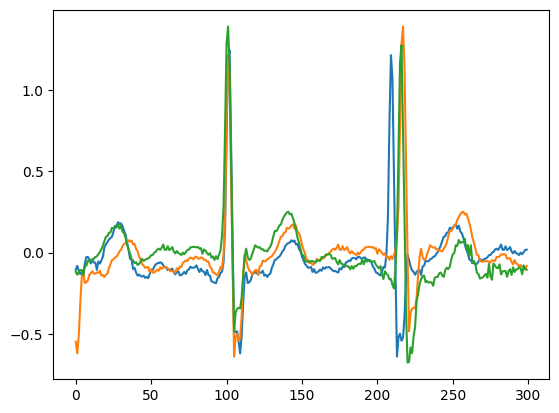

In [ ]:
# Plotting 3 heartbeats
k = np.arange(100, 103)
for i in k:
  # print(i)
  # print(Rlocation[i] - 99, Rlocation[i] + 201)
  x_train = rdata[Rlocation[i] - 99:Rlocation[i] + 201]
  plt.plot(x_train)
  print(x_train.shape)
plt.show()

### **B4: Complete Preprocessing Figures**
The complete preprocessing including denosinsing, R-peak location detection and segmentation is expected to view in a single figure.

In [ ]:
r_peak_xx = Rlocation[0], Rlocation[1], Rlocation[2], Rlocation[3]
r_peak_yy = rdata[Rlocation[0]], rdata[Rlocation[1]], rdata[Rlocation[2]], rdata[Rlocation[3]]

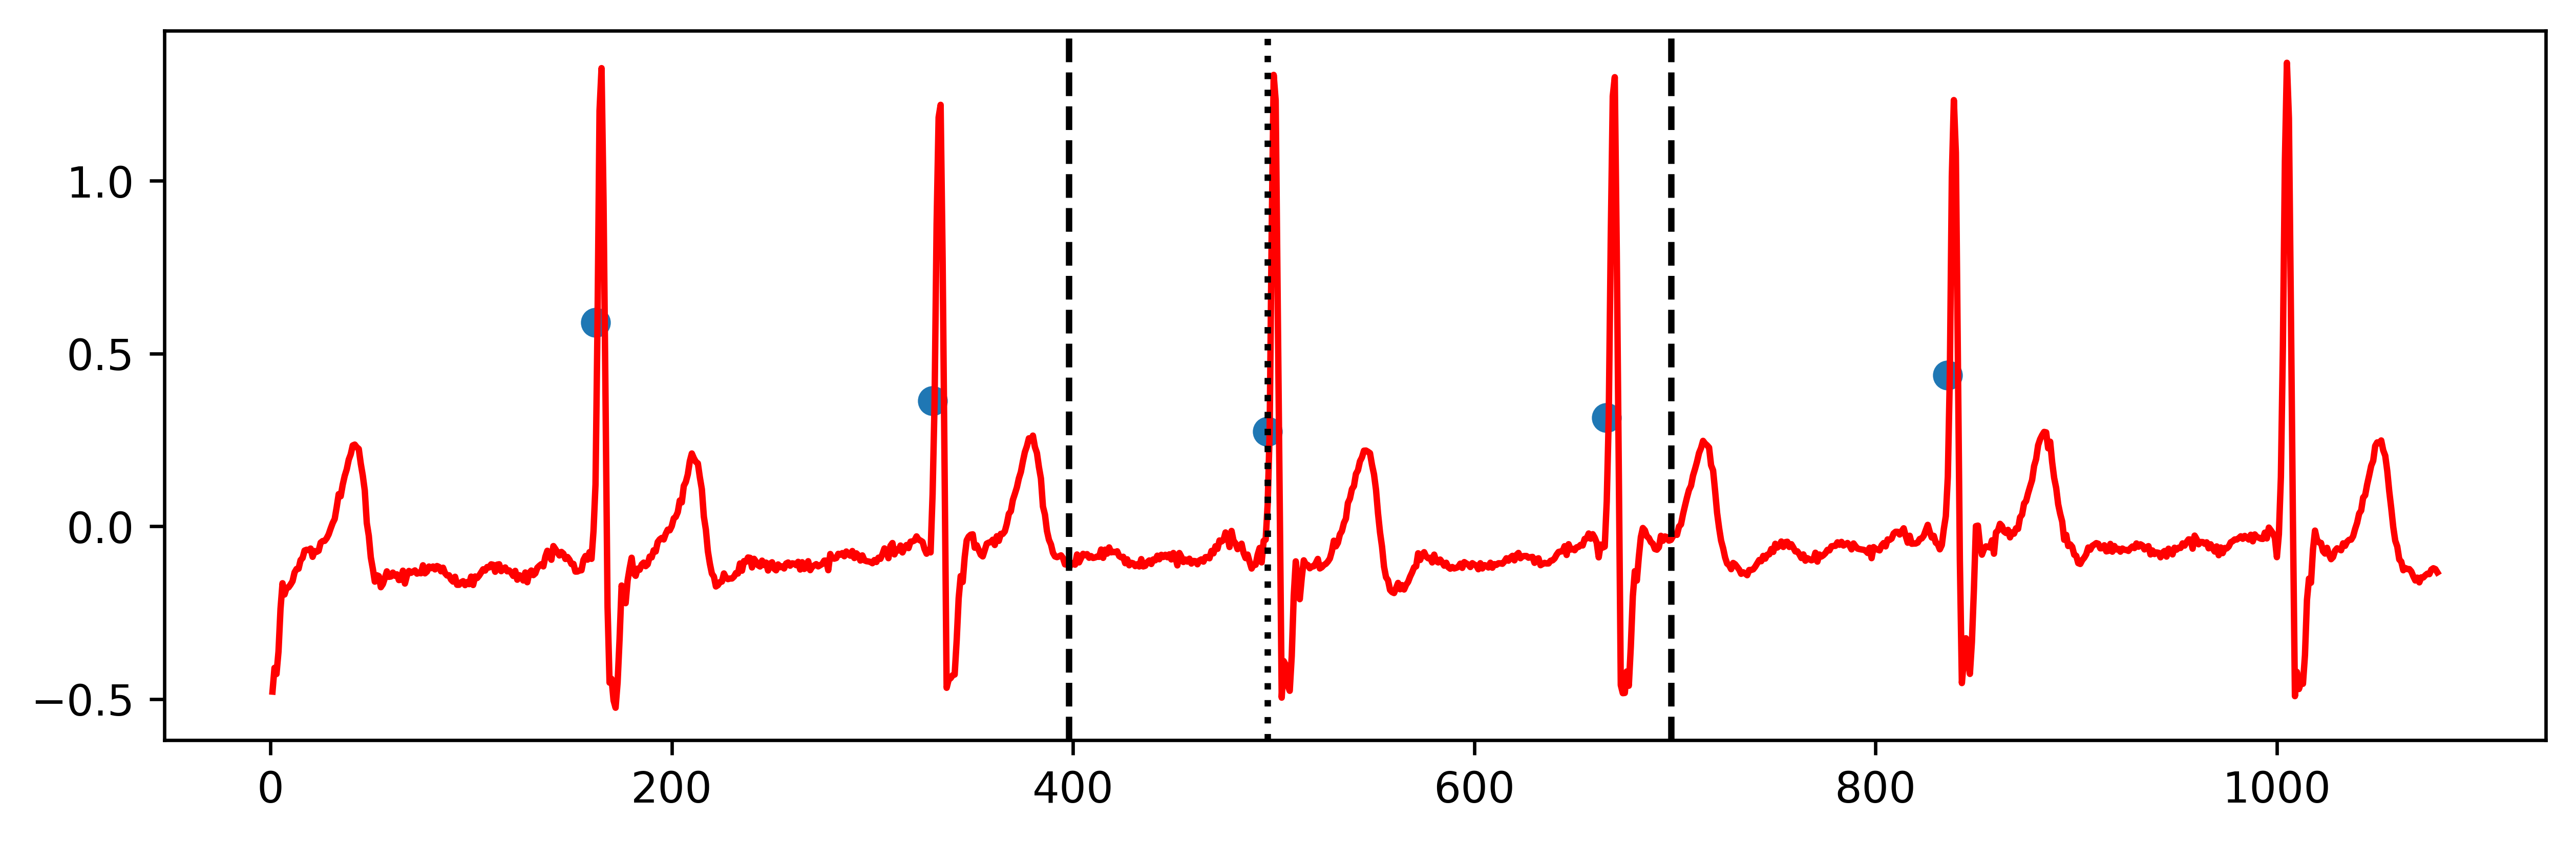

In [ ]:
# Plotting R-peaks and segmentation lines
fig = plt.figure(figsize=(10,3), dpi=600)
n_peak =5
r_peak_x = []
r_peak_y = []
for i in range(0, n_peak):
  r_peak_x.append(Rlocation[i])
  r_peak_y.append(rdata[Rlocation[i]])
x = np.arange(1, 1081)
plt.plot(x, rdata[0: 1080], color='red')
plt.scatter(r_peak_x, r_peak_y)

# line plotting
plt.axvline(x = Rlocation[2], color = 'k', linestyle = ':')
plt.axvline(x = Rlocation[2]-99, color = 'k', linestyle = '--')
plt.axvline(x = Rlocation[2]+201, color = 'k', linestyle = '--')

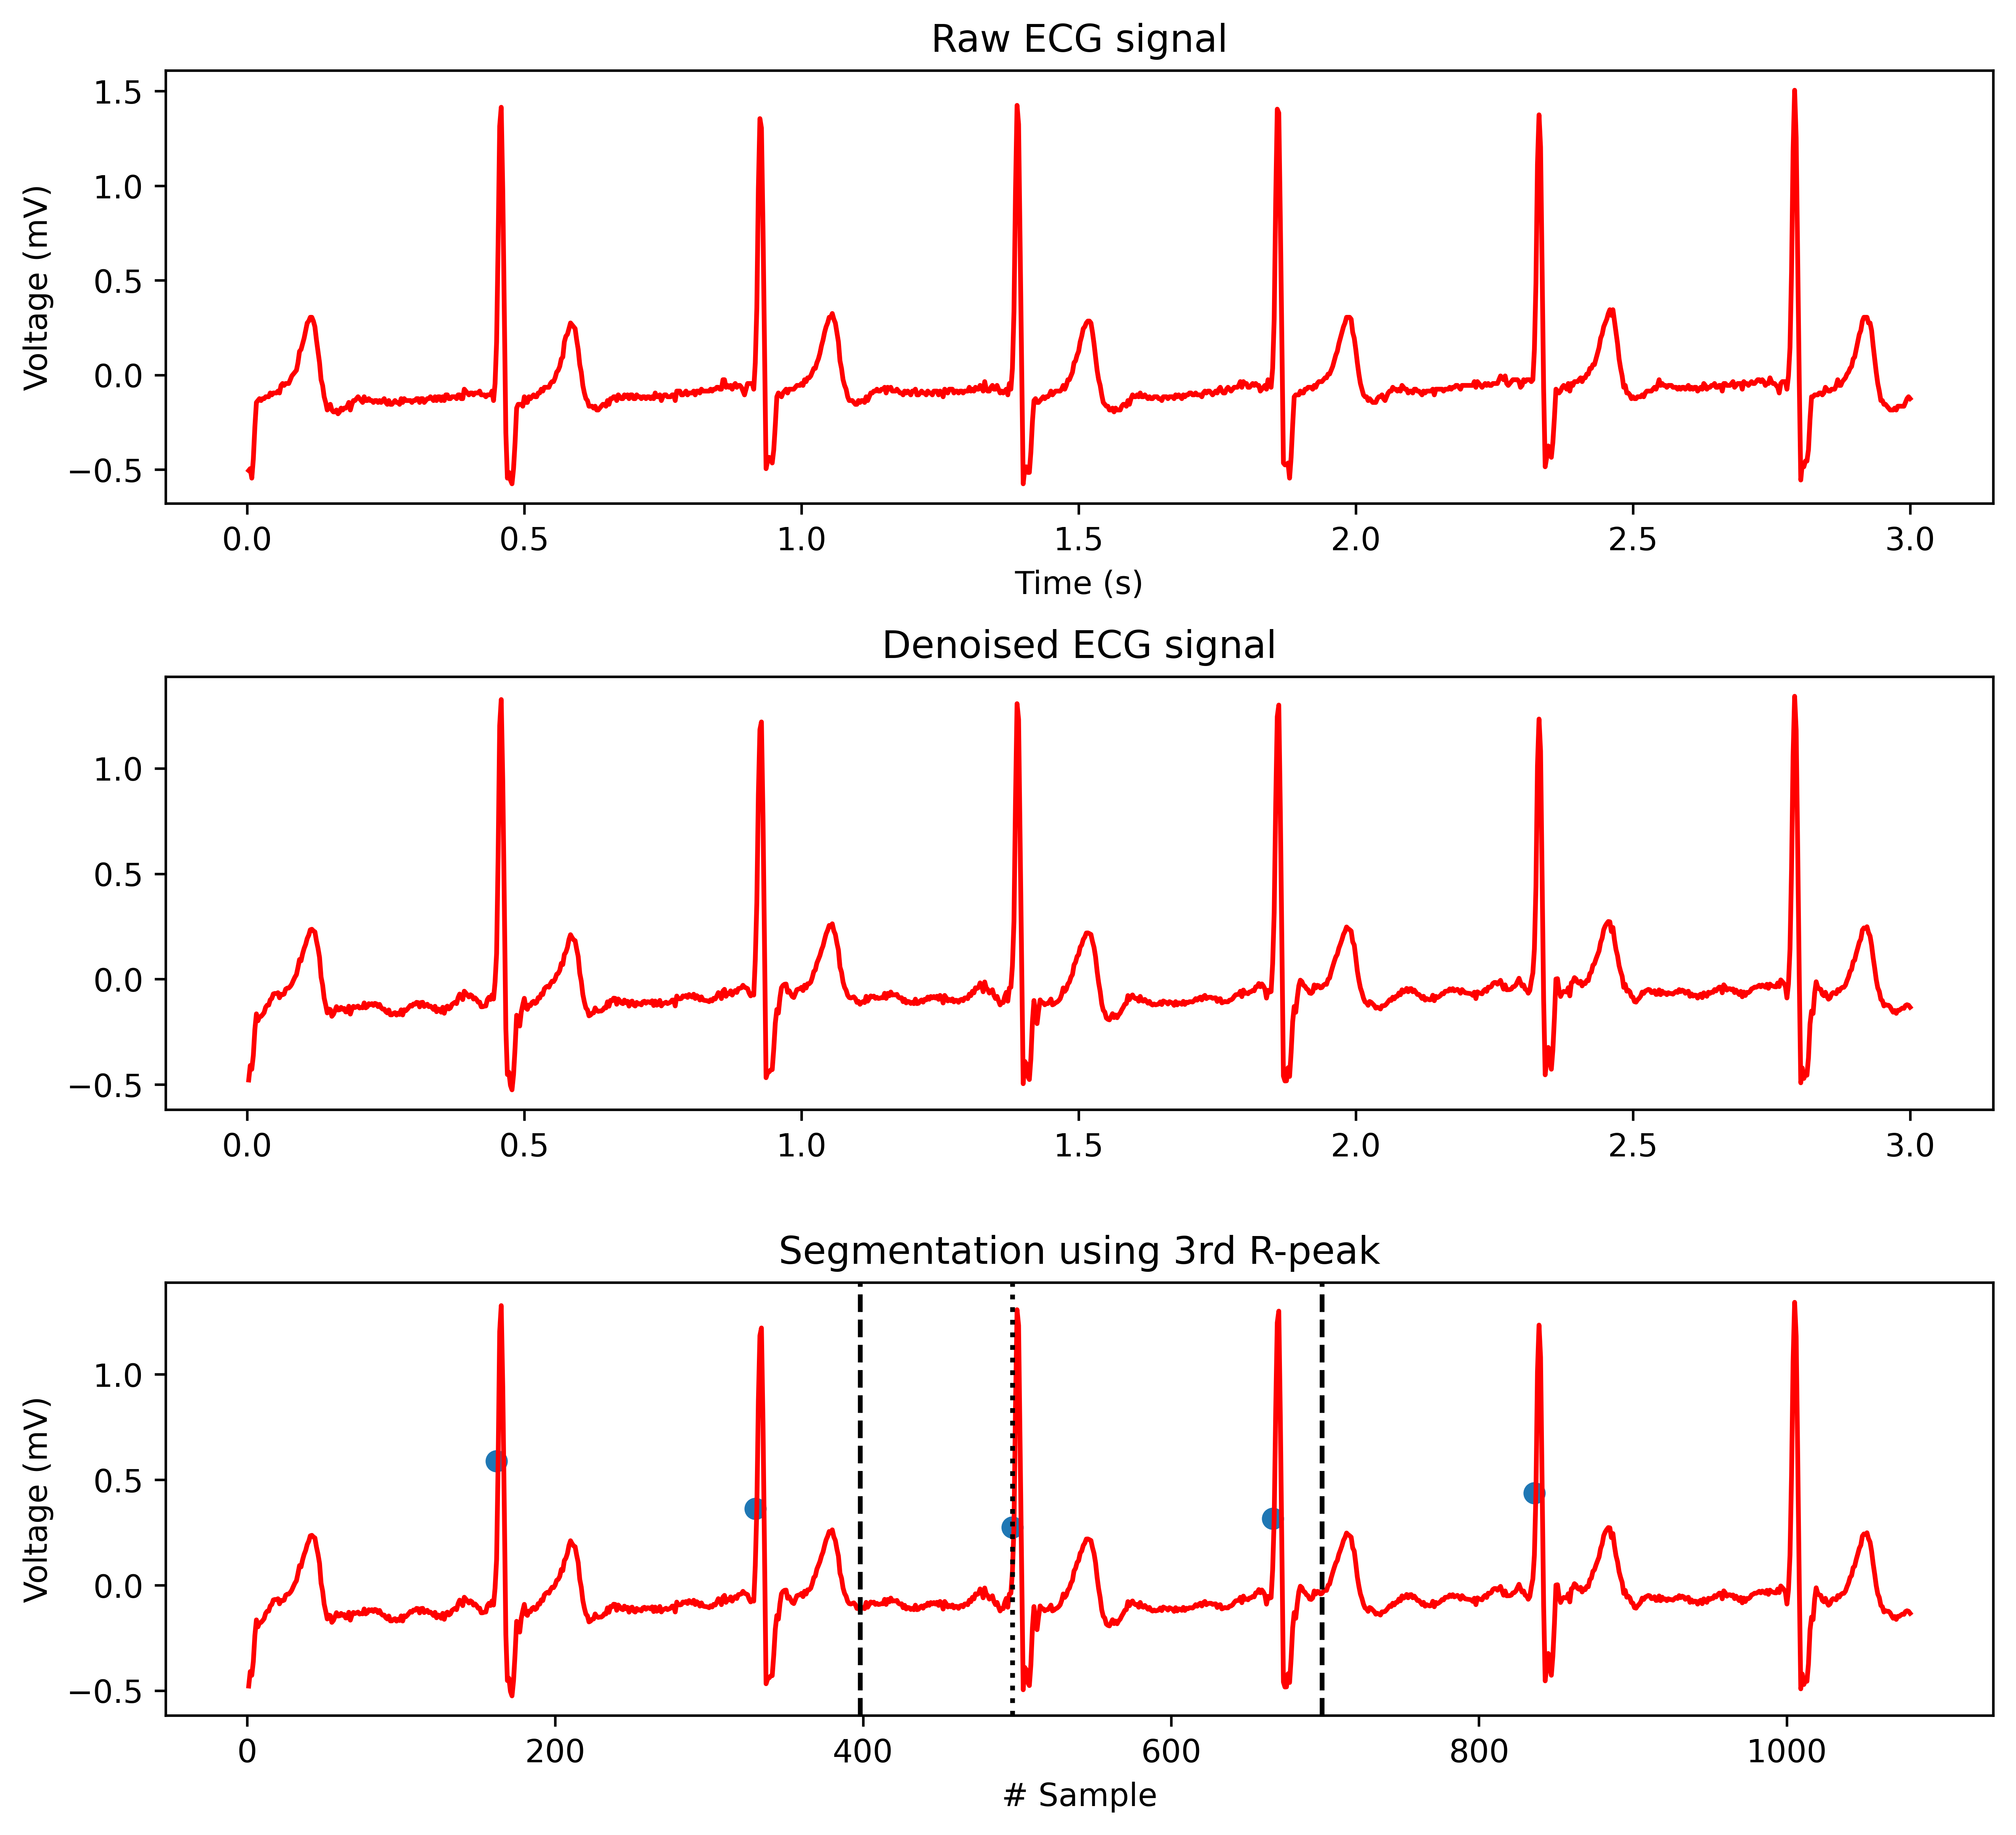

In [ ]:
# Plot together raw, denoised and segmted signal
fig = plt.figure(figsize=(10,9), dpi=600)
x = np.arange(1, 1081)

# Raw signal plotting
plt.subplot(3, 1, 1)
plt.plot(x/360, data[0:1080], color='red')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.title('Raw ECG signal')

# Denoised signal plotting
plt.subplot(3, 1, 2)
plt.plot(x/360, rdata[0:1080], color='red')
plt.title('Denoised ECG signal')

# Segmentation visualization using two border lines
plt.subplot(3, 1, 3)
n_peak =5
r_peak_x = []
r_peak_y = []
for i in range(0, n_peak):
  r_peak_x.append(Rlocation[i])
  r_peak_y.append(rdata[Rlocation[i]])
x = np.arange(1, 1081)
plt.plot(x, rdata[0: 1080], color='red')
plt.scatter(r_peak_x, r_peak_y)
# line plotting
plt.axvline(x = Rlocation[2], color = 'k', linestyle = ':') # 3rd r-peak
plt.axvline(x = Rlocation[2]-99, color = 'k', linestyle = '--')
plt.axvline(x = Rlocation[2]+201, color = 'k', linestyle = '--')

plt.xlabel('# Sample')
plt.ylabel('Voltage (mV)')
plt.title('Segmentation using 3rd R-peak')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

# figure_path = '/content/gdrive/MyDrive/Heartbeat_Figures/'
# fig.savefig(figure_path+ 'Denoised and segmented ECG.png')

# **Part C: Dataset Loading**

## **C1: Loading whole data**

In [ ]:
def getDataSet(number, X_data, Y_data):

    # ⚠️ SVDB has fewer labeled beat types (not all 15 from MIT-BIH)
    # We'll still map the same set; unknown symbols will be skipped.
    ecgClassSet = ['N','L','R','e','j','A','a','J','S','V','E','F','/','f','Q']

    # --- Read signal header to detect channels ---
    record_path = os.path.join(project_path, number)
    record = wfdb.rdrecord(record_path)                 # SVDB typically has 2 channels
    channels = record.sig_name
    channel1 = channels[0]                             # Just take the first one
    print("Using channel:", channel1)

    # --- Read the ECG signal ---
    print("reading " + number + " ECG data...")
    data = record.p_signal[:,0].flatten()               # use first channel
    rdata = denoise(data)                               # reuse your denoise() from Part B

    # --- Read annotations ---
    annotation = wfdb.rdann(record_path, 'atr')         # annotation type is still 'atr'
    Rlocation = annotation.sample
    Rclass = annotation.symbol

    # --- Remove unstable first/last beats ---
    start, end = 2, 3
    i = start
    j = len(Rclass) - end

    # ⚙️ Window length adapted to 128 Hz (≈ 1 s)
    window_left = 43
    window_right = 85
    window_len = window_left + window_right

    # --- Build the dataset ---
    while i < j:
        try:
            beat_type = Rclass[i]
            label = ecgClassSet.index(beat_type)
            segment = rdata[Rlocation[i]-window_left : Rlocation[i]+window_right]

            if len(segment) == window_len:
                X_data.append(segment)
                Y_data.append(label)
            else:
                # Skip malformed segments
                pass
            i += 1
        except ValueError:
            # skip beats not in ecgClassSet
            i += 1
    return X_data, Y_data

In [ ]:
def loadData():
    numberSet = RECORDS
    dataSet, labelSet = [], []

    for n in numberSet:
        dataSet, labelSet = getDataSet(n, dataSet, labelSet)

    # reshape according to 128-sample window
    dataSet = np.array(dataSet).reshape(-1, 128)
    labelSet = np.array(labelSet).reshape(-1, 1)

    train_ds = np.hstack((dataSet, labelSet))
    np.random.shuffle(train_ds)

    X = train_ds[:, :128]
    Y = train_ds[:, 128]
    return X, Y

X, Y = loadData()

Using channel: ECG1
reading 800 ECG data...
Using channel: ECG1
reading 801 ECG data...
Using channel: ECG1
reading 802 ECG data...
Using channel: ECG1
reading 803 ECG data...
Using channel: ECG1
reading 804 ECG data...
Using channel: ECG1
reading 805 ECG data...
Using channel: ECG1
reading 806 ECG data...
Using channel: ECG1
reading 807 ECG data...
Using channel: ECG1
reading 808 ECG data...
Using channel: ECG1
reading 809 ECG data...
Using channel: ECG1
reading 810 ECG data...
Using channel: ECG1
reading 811 ECG data...
Using channel: ECG1
reading 812 ECG data...
Using channel: ECG1
reading 820 ECG data...
Using channel: ECG1
reading 821 ECG data...
Using channel: ECG1
reading 822 ECG data...
Using channel: ECG1
reading 823 ECG data...
Using channel: ECG1
reading 824 ECG data...
Using channel: ECG1
reading 825 ECG data...
Using channel: ECG1
reading 826 ECG data...
Using channel: ECG1
reading 827 ECG data...
Using channel: ECG1
reading 828 ECG data...
Using channel: ECG1
reading 829 

In [ ]:
# Input X and Output Y data loading
X, Y = loadData()

Using channel: ECG1
reading 800 ECG data...
Using channel: ECG1
reading 801 ECG data...
Using channel: ECG1
reading 802 ECG data...
Using channel: ECG1
reading 803 ECG data...
Using channel: ECG1
reading 804 ECG data...
Using channel: ECG1
reading 805 ECG data...
Using channel: ECG1
reading 806 ECG data...
Using channel: ECG1
reading 807 ECG data...
Using channel: ECG1
reading 808 ECG data...
Using channel: ECG1
reading 809 ECG data...
Using channel: ECG1
reading 810 ECG data...
Using channel: ECG1
reading 811 ECG data...
Using channel: ECG1
reading 812 ECG data...
Using channel: ECG1
reading 820 ECG data...
Using channel: ECG1
reading 821 ECG data...
Using channel: ECG1
reading 822 ECG data...
Using channel: ECG1
reading 823 ECG data...
Using channel: ECG1
reading 824 ECG data...
Using channel: ECG1
reading 825 ECG data...
Using channel: ECG1
reading 826 ECG data...
Using channel: ECG1
reading 827 ECG data...
Using channel: ECG1
reading 828 ECG data...
Using channel: ECG1
reading 829 

In [ ]:
# Counting the number of each type of heartbeats
from collections import Counter
Y_list = list(Y)
Counter(Y_list)

Counter({np.float64(0.0): 161987,
         np.float64(8.0): 12175,
         np.float64(9.0): 9925,
         np.float64(14.0): 79,
         np.float64(11.0): 23,
         np.float64(7.0): 9,
         np.float64(6.0): 1})

## **C2: Ploting 15 Different Heartbeats**

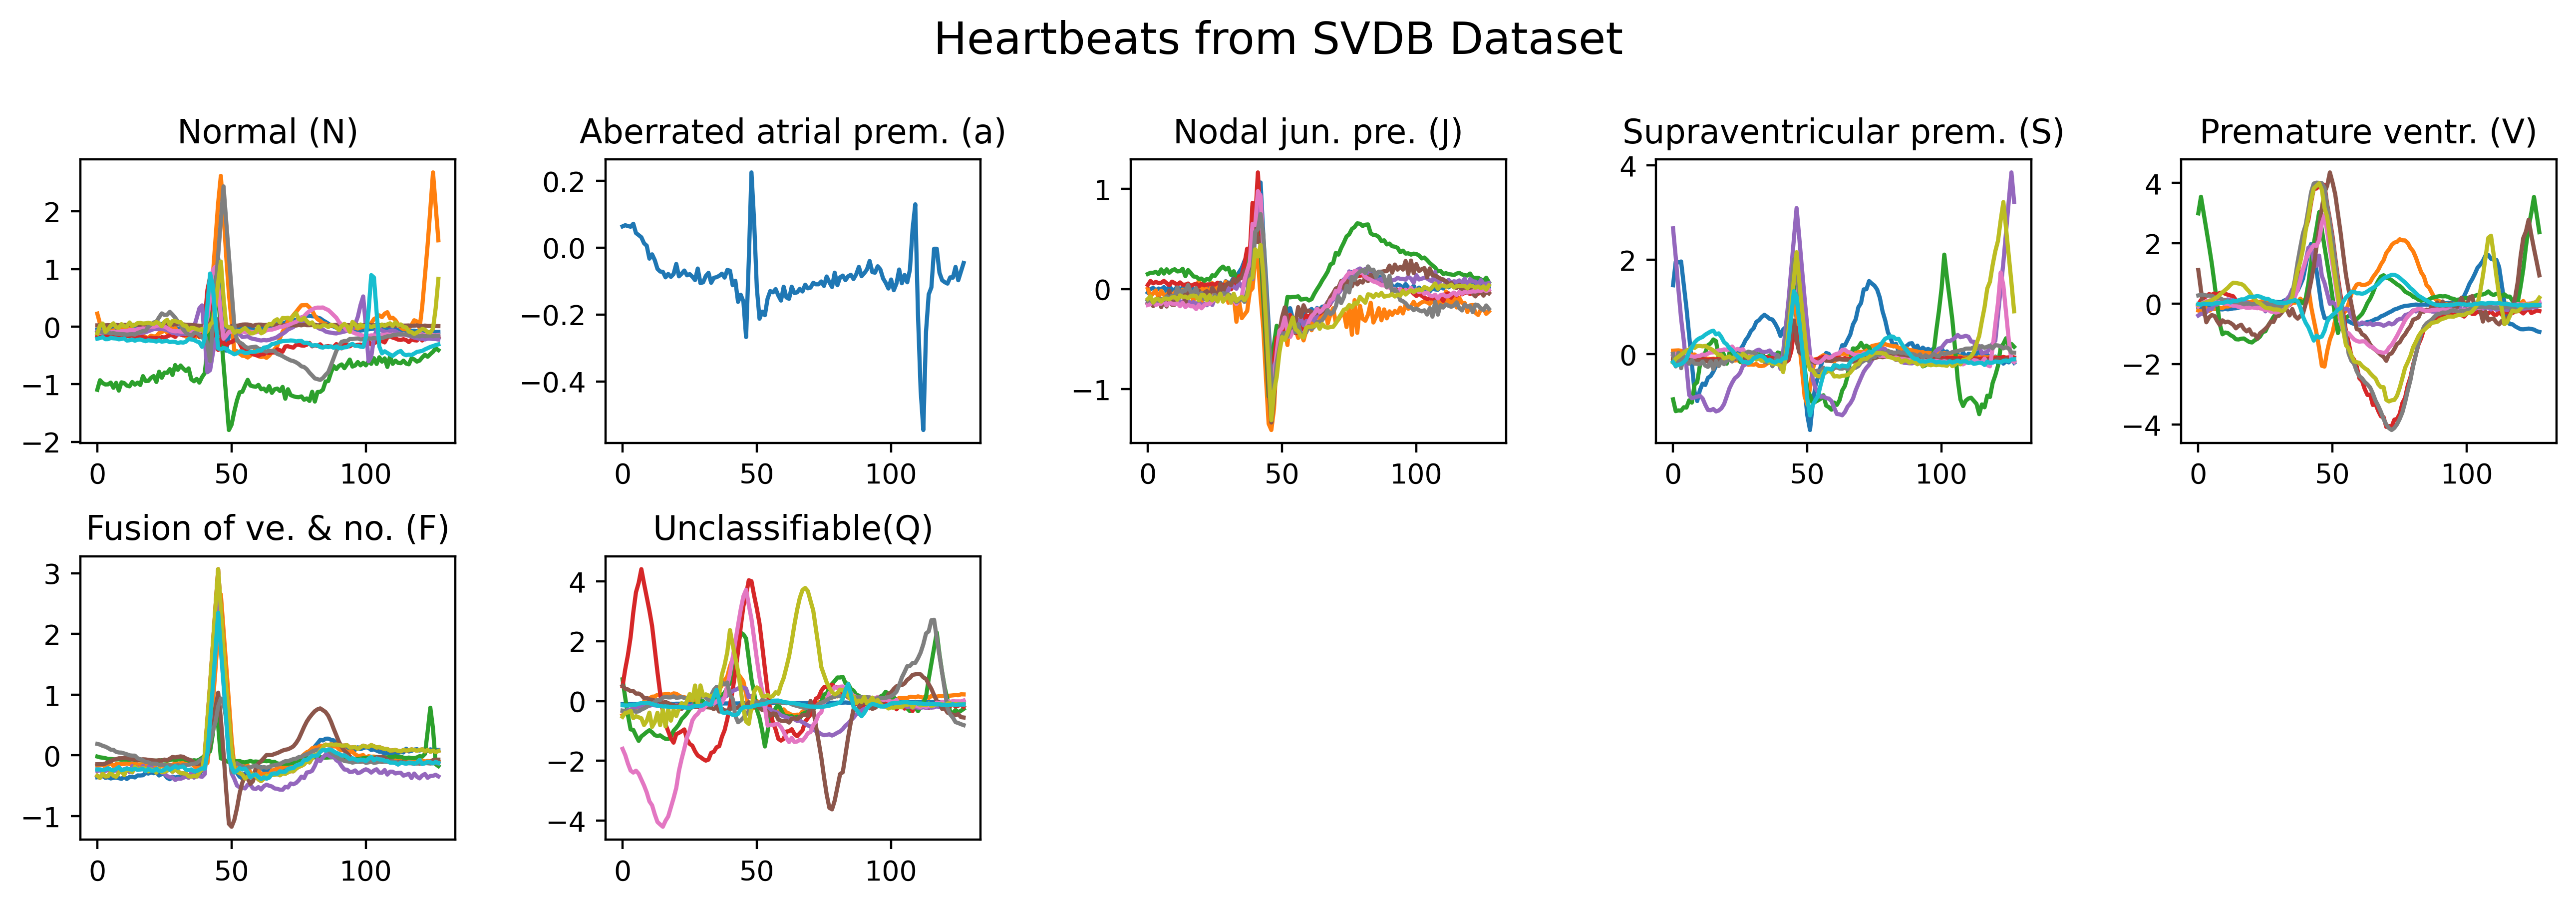

In [ ]:
# Make pandas DataFrames
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)
df_Y.columns = ['label']   # ✅ robust column naming
df = pd.concat([df_X, df_Y], axis=1)

def Plot_Random_Beat(type, num):
    ecgClassSet = ['N','L','R','e','j','A','a','J','S','V','E','F','slash','f','Q']
    ecgClassName = ['Normal (N)', 'Left bundle br. bl. (L)', 'Right bundle br. bl. (R)',
                    'Atrial escape (e)', 'Nodal jun. esc. (j)', 'Atrial premature (A)',
                    'Aberrated atrial prem. (a)', 'Nodal jun. pre. (J)',
                    'Supraventricular prem. (S)', 'Premature ventr. (V)',
                    'Ventricular escape (E)', 'Fusion of ve. & no. (F)',
                    'Paced (/)', 'Fusion of pa. & no. (f)', 'Unclassifiable(Q)']

    # ✅ access label column safely
    df_0 = df.loc[df['label'] == type]
    df_0 = df_0.drop(columns=['label'])

    if num <= df_0.shape[0]:
        np.random.seed(234)
        random_beat_number = np.random.randint(df_0.shape[0], size=(num))
    else:
        print(f"Warning: Only {df_0.shape[0]} beats found for class {type}")
        random_beat_number = np.arange(df_0.shape[0])

    for i in random_beat_number:
        ecg_beat = df_0.iloc[i]
        plt.plot(ecg_beat)
    plt.title(str(ecgClassName[type]))

# Plot dynamically existing heartbeat classes
fig = plt.figure(figsize=(16,7), dpi=400)
fig.tight_layout(pad=15.0)

unique_labels = sorted(set(Y.astype(int)))
for i, label in enumerate(unique_labels):
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Plot_Random_Beat(type=label, num=10)

plt.suptitle("Heartbeats from SVDB Dataset", fontsize=16)
plt.show()

# **Part D: Train-Test Splitting and Class Balancing**

Using channel: ECG1
reading 800 ECG data...
Using channel: ECG1
reading 801 ECG data...
Using channel: ECG1
reading 802 ECG data...
Using channel: ECG1
reading 803 ECG data...
Using channel: ECG1
reading 804 ECG data...
Using channel: ECG1
reading 805 ECG data...
Using channel: ECG1
reading 806 ECG data...
Using channel: ECG1
reading 807 ECG data...
Using channel: ECG1
reading 808 ECG data...
Using channel: ECG1
reading 809 ECG data...
Using channel: ECG1
reading 810 ECG data...
Using channel: ECG1
reading 811 ECG data...
Using channel: ECG1
reading 812 ECG data...
Using channel: ECG1
reading 820 ECG data...
Using channel: ECG1
reading 821 ECG data...
Using channel: ECG1
reading 822 ECG data...
Using channel: ECG1
reading 823 ECG data...
Using channel: ECG1
reading 824 ECG data...
Using channel: ECG1
reading 825 ECG data...
Using channel: ECG1
reading 826 ECG data...
Using channel: ECG1
reading 827 ECG data...
Using channel: ECG1
reading 828 ECG data...
Using channel: ECG1
reading 829 

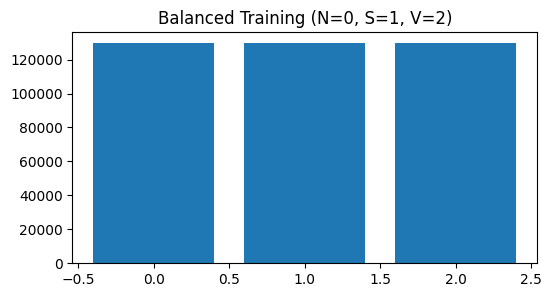

Final shapes:
  X_train, X_val, X_test: (330451, 128, 1) (58316, 128, 1) (36820, 128, 1)
  y_train, y_val, y_test: (330451,) (58316,) (36820,)
  Train counts: Counter({np.int64(0): 110151, np.int64(1): 110150, np.int64(2): 110150})
  Val   counts: Counter({np.int64(2): 19439, np.int64(1): 19439, np.int64(0): 19438})
  Test  counts: Counter({np.int64(0): 32398, np.int64(1): 2437, np.int64(2): 1985})


In [ ]:
# ============================================================
# PART D – Dataset preprocessing and balancing for SVDB (3 classes: N,S,V)
# ============================================================

from collections import Counter
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---- Load full dataset (built by your Part C getDataSet for SVDB) ----
def loadData():
    numberSet = RECORDS           # e.g., ['801','802', ...]
    dataSet, labelSet = [], []
    for n in numberSet:
        dataSet, labelSet = getDataSet(n, dataSet, labelSet)

    # SVDB window = 128 samples
    dataSet  = np.array(dataSet).reshape(-1, 128)
    labelSet = np.array(labelSet).reshape(-1, 1)  # 15-class indices from ecgClassSet

    train_ds = np.hstack((dataSet, labelSet))
    np.random.shuffle(train_ds)
    return train_ds

train_ds = loadData()
print("Raw dataset shape (beats x 129):", train_ds.shape)

# ----------------------------------------------------------------------
# D1: Map 15 raw labels -> 3 classes for SVDB
#   ecgClassSet index groups:
#     N-group: indices 0..4    -> class 0
#     S-group: indices 5..8    -> class 1
#     V-group: indices 9..10   -> class 2
#     others (11..14)          -> drop for SVDB
# ----------------------------------------------------------------------
X_all_128  = train_ds[:, :128]
Y15_raw    = train_ds[:, 128].astype(int)

# Build 3-class labels, mark others as -1 to drop
Y3 = np.full_like(Y15_raw, fill_value=-1)
Y3[(Y15_raw >= 0)  & (Y15_raw <= 4)]  = 0   # N
Y3[(Y15_raw >= 5)  & (Y15_raw <= 8)]  = 1   # S
Y3[(Y15_raw >= 9)  & (Y15_raw <= 10)] = 2   # V

valid_idx = (Y3 != -1)
X_all_128 = X_all_128[valid_idx]
Y3        = Y3[valid_idx]

print("After 3-class filtering:")
print("  Shape:", X_all_128.shape)
print("  Class counts (N,S,V):", Counter(Y3))

# ----------------------------------------------------------------------
# D2: Train/Test split (hold out imbalanced test set)
# ----------------------------------------------------------------------
x_train, x_test, y_train, y_test = train_test_split(
    X_all_128, Y3,
    test_size=0.20,
    random_state=104,
    shuffle=True,
    stratify=Y3 if len(set(Y3)) > 1 else None
)

# Save test holdout (keep as DataFrame like your pipeline expects)
test_df = pd.DataFrame(np.hstack([x_test, y_test.reshape(-1,1)]))
test_df.to_pickle(project_path + 'test_data.pkl')

print("Train/Test shapes:", x_train.shape, x_test.shape)
print("Train class counts:", Counter(y_train))
print("Test  class counts:", Counter(y_test))

# ----------------------------------------------------------------------
# D3: Balance TRAIN with SMOTE (only if it’s feasible)
#   - We oversample minority classes up to the majority count.
#   - Handle small-class edge cases (k_neighbors must be < min_class_count).
# ----------------------------------------------------------------------
from imblearn.over_sampling import SMOTE

# If any class has < 2 samples, SMOTE will fail. In that case, skip balancing.
train_counts = Counter(y_train)
min_count = min(train_counts.values())
maj_count = max(train_counts.values())
print("Pre-SMOTE train counts:", train_counts)

can_smote = (len(train_counts) >= 2) and (min_count >= 2)

if can_smote:
    # k_neighbors must be < smallest class count
    k_neighbors = max(1, min(5, min_count - 1))
    sm = SMOTE(sampling_strategy='not majority', k_neighbors=k_neighbors, random_state=42)
    X_bal, y_bal = sm.fit_resample(x_train, y_train)
    print(f"SMOTE used with k_neighbors={k_neighbors}")
else:
    print("SMOTE skipped (not enough samples per minority class). Using original train set.")
    X_bal, y_bal = x_train, y_train

print("Post-balance train counts:", Counter(y_bal))

# Save balanced train set like before
train_bal_df = pd.DataFrame(np.hstack([X_bal, y_bal.reshape(-1,1)]))
train_bal_df.to_pickle(project_path + 'train_data_SMOTE.pkl')

# Quick bars
plt.figure(figsize=(6,3))
c = Counter(y_bal)
plt.bar(c.keys(), c.values())
plt.title("Balanced Training (N=0, S=1, V=2)")
plt.show()

# ----------------------------------------------------------------------
# D4: Final arrays for model training (CNN expects (N, 128, 1))
# ----------------------------------------------------------------------
train_np = train_bal_df.to_numpy()
test_np  = test_df.to_numpy()

X_train_full = train_np[:, :128][..., None]  # (N, 128, 1)
y_train_full = train_np[:, 128].astype('int64')

X_test = test_np[:, :128][..., None]
y_test = test_np[:, 128].astype('int64')

# Split TRAIN -> train/val
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.15, random_state=42,
    stratify=y_train_full if len(set(y_train_full)) > 1 else None
)

print("Final shapes:")
print("  X_train, X_val, X_test:", X_train.shape, X_val.shape, X_test.shape)
print("  y_train, y_val, y_test:", y_train.shape, y_val.shape, y_test.shape)
print("  Train counts:", Counter(y_train))
print("  Val   counts:", Counter(y_val))
print("  Test  counts:", Counter(y_test))

# **Part E: Model Building and Training**
A **CNN-LSTM and attention** based hybrid model is formulated.

## **E2: CNN-LSTM and attention model architecture**

Class weights (auto): {0: 0.9999939477020938, 1: 1.0000030261764261, 2: 1.0000030261764261}

=== Training CNN1D ===
Epoch 1/15

[Val] macro-F1: 0.8850
5164/5164 - 37s - 7ms/step - accuracy: 0.8047 - loss: 0.4712 - val_accuracy: 0.8858 - val_loss: 0.2950 - learning_rate: 1.0000e-03
Epoch 2/15

[Val] macro-F1: 0.9122
5164/5164 - 23s - 5ms/step - accuracy: 0.8678 - loss: 0.3424 - val_accuracy: 0.9120 - val_loss: 0.2448 - learning_rate: 1.0000e-03
Epoch 3/15

[Val] macro-F1: 0.9242
5164/5164 - 24s - 5ms/step - accuracy: 0.8861 - loss: 0.3002 - val_accuracy: 0.9243 - val_loss: 0.2103 - learning_rate: 1.0000e-03
Epoch 4/15

[Val] macro-F1: 0.9313
5164/5164 - 24s - 5ms/step - accuracy: 0.8957 - loss: 0.2755 - val_accuracy: 0.9315 - val_loss: 0.1943 - learning_rate: 1.0000e-03
Epoch 5/15

[Val] macro-F1: 0.9352
5164/5164 - 27s - 5ms/step - accuracy: 0.9019 - loss: 0.2597 - val_accuracy: 0.9353 - val_loss: 0.1827 - learning_rate: 1.0000e-03
Epoch 6/15

[Val] macro-F1: 0.9388
5164/5164 - 28s - 5

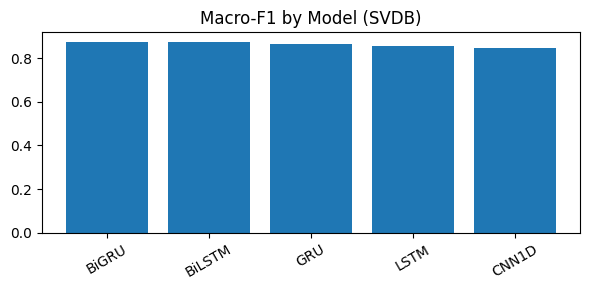

In [ ]:
# ============================================================
# PART E – Model Zoo for SVDB (3 classes, 128×1) — YOUR 5 MODELS
# ============================================================
import os, time, numpy as np, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import (f1_score, confusion_matrix,
                             precision_score, recall_score, roc_auc_score)
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42); tf.random.set_seed(42)

# --- Safety checks from Part D ---
assert X_train.ndim == 3 and X_train.shape[1:] == (128,1), f"X_train must be (N,128,1), got {X_train.shape}"
assert len(np.unique(y_train)) <= 3, "SVDB should be 3 classes (N,S,V) after your Part D mapping."

# --- 1) Per-beat z-score normalization ---
def zscore_per_sample(x, axis=(1,2), eps=1e-6):
    m = x.mean(axis=axis, keepdims=True)
    s = x.std(axis=axis, keepdims=True)
    return (x - m) / (s + eps)

X_train = zscore_per_sample(X_train)
X_val   = zscore_per_sample(X_val)
X_test  = zscore_per_sample(X_test)

input_shape = X_train.shape[1:]   # (128,1)
num_classes = 3                   # N=0, S=1, V=2

# --- 2) Class weights (use if you did NOT SMOTE) ---
classes = np.sort(np.unique(y_train))
class_weights_arr = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
CLASS_WEIGHT = {int(c): float(w) for c, w in zip(classes, class_weights_arr)}
print("Class weights (auto):", CLASS_WEIGHT)

# If you already balanced with SMOTE in Part D, set this to False.
USE_CLASS_WEIGHT = False

# --- 3) Common model helpers (no label_smoothing for TF compatibility) ---
def common_tail(x, num_classes):
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.3)(x)
    return layers.Dense(num_classes, activation="softmax")(x)

def compile_model(inputs, outputs, lr=1e-3):
    model = keras.Model(inputs, outputs)
    loss_fn = keras.losses.SparseCategoricalCrossentropy()
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=loss_fn,
        metrics=["accuracy"]  # compute F1/PR/AUROC post-hoc
    )
    return model

# --- 4) Architectures (your requested 5) ---
def build_cnn1d(filters=[32,64,128], kernel=7):
    inp = keras.Input(shape=input_shape)
    x = inp
    for f in filters:
        x = layers.Conv1D(f, kernel, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.MaxPooling1D(2)(x)
        x = layers.Dropout(0.2)(x)
    out = common_tail(x, num_classes)
    return compile_model(inp, out)

def build_lstm(units=128):
    inp = keras.Input(shape=input_shape)
    x = layers.LSTM(units, return_sequences=False)(inp)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return compile_model(inp, out)

def build_bilstm(units=96):
    inp = keras.Input(shape=input_shape)
    x = layers.Bidirectional(layers.LSTM(units))(inp)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return compile_model(inp, out)

def build_gru(units=128):
    inp = keras.Input(shape=input_shape)
    x = layers.GRU(units)(inp)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return compile_model(inp, out)

def build_bigru(units=96):
    inp = keras.Input(shape=input_shape)
    x = layers.Bidirectional(layers.GRU(units))(inp)
    x = layers.Dropout(0.3)(x)
    out = layers.Dense(num_classes, activation="softmax")(x)
    return compile_model(inp, out)

MODEL_ZOO = {
    "CNN1D": build_cnn1d,
    "LSTM": build_lstm,
    "BiLSTM": build_bilstm,
    "GRU": build_gru,
    "BiGRU": build_bigru,
      "TCN": build_tcn,
    "ResNet1D-18": build_resnet1d18,
    "VGG1D-16": build_vgg1d16,
    "InceptionTime": build_inceptiontime,
}

# --- 5) Callback that saves best-by macro F1 ---
class ValMacroF1(keras.callbacks.Callback):
    def __init__(self, x_val, y_val, model_name):
        super().__init__()
        self.x_val = x_val
        self.y_val = y_val
        self.best_f1 = -1.0
        self.model_name = model_name

    def on_epoch_end(self, epoch, logs=None):
        y_prob = self.model.predict(self.x_val, verbose=0)
        y_hat  = np.argmax(y_prob, axis=1)
        f1m = f1_score(self.y_val, y_hat, average='macro')
        print(f"\n[Val] macro-F1: {f1m:.4f}")
        if f1m > self.best_f1:
            self.best_f1 = f1m
            self.model.save(f"best_by_f1_{self.model_name}.keras")

def callbacks(name):
    return [
        keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, monitor="val_loss"),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor="val_loss"),
        ValMacroF1(X_val, y_val, name),
    ]

# --- 6) Train loop ---
EPOCHS = 15
BATCH  = 64
results = []

for name, builder in MODEL_ZOO.items():
    print(f"\n=== Training {name} ===")
    model = builder()

    start = time.time()
    hist = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=EPOCHS, batch_size=BATCH,
        callbacks=callbacks(name),
        verbose=2,
        class_weight=(CLASS_WEIGHT if USE_CLASS_WEIGHT else None),
    )
    train_time = time.time() - start

    # Load best-by-F1 checkpoint (if saved), else keep current
    best_path = f"best_by_f1_{name}.keras"
    if os.path.exists(best_path):
        model = keras.models.load_model(best_path)

    # Evaluate
    y_prob = model.predict(X_test, verbose=0)
    y_hat  = np.argmax(y_prob, axis=1)

    acc  = (y_hat == y_test).mean()
    f1m  = f1_score(y_test, y_hat, average='macro')
    prec = precision_score(y_test, y_hat, average='macro', zero_division=0)
    rec  = recall_score(y_test, y_hat, average='macro', zero_division=0)

    # Macro AUROC (one-vs-rest)
    y_test_oh = label_binarize(y_test, classes=[0,1,2])
    auroc_macro = roc_auc_score(y_test_oh, y_prob, average='macro', multi_class='ovr')

    cm = confusion_matrix(y_test, y_hat)
    pd.DataFrame(cm, index=["N","S","V"], columns=["N","S","V"]).to_csv(f"cm_{name}.csv")

    params = model.count_params()

    results.append({
        "model": name,
        "params": int(params),
        "test_acc": float(acc),
        "test_f1_macro": float(f1m),
        "precision_macro": float(prec),
        "recall_macro": float(rec),
        "auroc_macro_ovr": float(auroc_macro),
        "train_time_sec": int(train_time),
        "best_ckpt": (best_path if os.path.exists(best_path) else "last_session_model")
    })

# --- 7) Leaderboard ---
df = pd.DataFrame(results).sort_values("test_f1_macro", ascending=False)
df.to_csv("results_with_pr_auc.csv", index=False)
print(df)

plt.figure(figsize=(6,3))
plt.bar(df["model"], df["test_f1_macro"])
plt.title("Macro-F1 by Model (SVDB)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
# ================================================
# Part F2: CNN–GRU fusion sweep (sequential | parallel | interleaved | multiscale)
# ================================================
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize

# ---------- Small helpers ----------
def _ensure_3d(X):
    """Make sure X is (N, seq_len, 1)."""
    return X if X.ndim == 3 else X[..., None]

def _callbacks(tag):
    return [
        keras.callbacks.ModelCheckpoint(
            f"best_cnn_gru_{tag}.keras", save_best_only=True,
            monitor="val_accuracy", mode="max"
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", patience=4, factor=0.5, min_lr=1e-5
        ),
        keras.callbacks.EarlyStopping(
            monitor="val_accuracy", mode="max", patience=8, restore_best_weights=True
        ),
    ]

def _metrics(y_true, y_prob):
    y_pred = np.argmax(y_prob, axis=1)
    acc = accuracy_score(y_true, y_pred)
    f1m = f1_score(y_true, y_pred, average="macro", zero_division=0)
    # AUROC (OvR) if >2 classes
    C = y_prob.shape[1]
    try:
        Yb = label_binarize(y_true, classes=np.arange(C))
        auroc = roc_auc_score(Yb, y_prob, average="macro", multi_class="ovr") if C > 2 \
                else roc_auc_score(y_true, y_prob[:,1])
    except Exception:
        auroc = float("nan")
    return acc, f1m, auroc

# ---------- Basic blocks ----------
def conv_block(x, filters, k, pool=True, drop=0.0):
    x = layers.Conv1D(filters, k, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    if pool:
        x = layers.MaxPooling1D(2)(x)
    if drop > 0:
        x = layers.Dropout(drop)(x)
    return x

def multi_scale_cnn(x, nf=32):
    b1 = layers.Conv1D(nf, 3,  padding="same")(x)
    b2 = layers.Conv1D(nf, 7,  padding="same")(x)
    b3 = layers.Conv1D(nf, 15, padding="same")(x)
    x  = layers.Concatenate()([b1, b2, b3])
    x  = layers.BatchNormalization()(x)
    x  = layers.ReLU()(x)
    return x

# ---------- Fusion builders ----------
def build_cnn_gru_fusion(fusion: str,
                         seq_input_shape,
                         n_classes: int,
                         gru_units: int = 64) -> keras.Model:
    """
    fusion in {"sequential","parallel","interleaved","multiscale"}
    """
    inp = keras.Input(shape=seq_input_shape)

    if fusion == "sequential":
        # CNN -> (Bi)GRU -> GAP -> Dense
        x = conv_block(inp, 32, 7, pool=True,  drop=0.1)
        x = conv_block(x,   64, 5, pool=True,  drop=0.1)
        x = layers.SpatialDropout1D(0.1)(x)
        x = layers.Bidirectional(layers.GRU(gru_units, return_sequences=True, dropout=0.2))(x)
        x = layers.LayerNormalization()(x)
        x = layers.GlobalAveragePooling1D()(x)

    elif fusion == "parallel":
        # Branch A: CNN -> GAP
        ca = conv_block(inp, 32, 7, pool=True,  drop=0.1)
        ca = conv_block(ca,  64, 5, pool=True,  drop=0.1)
        ca = layers.GlobalAveragePooling1D()(ca)
        # Branch B: (Bi)GRU -> last hidden (or GAP of sequences)
        cb = layers.Bidirectional(layers.GRU(gru_units, return_sequences=False, dropout=0.2))(inp)
        # Fuse
        x = layers.Concatenate()([ca, cb])

    elif fusion == "interleaved":
        # CNN -> (Bi)GRU -> CNN -> GAP
        x = conv_block(inp, 32, 7, pool=True,  drop=0.1)
        x = layers.Bidirectional(layers.GRU(gru_units, return_sequences=True, dropout=0.2))(x)
        x = layers.LayerNormalization()(x)
        x = layers.Conv1D(64, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.GlobalAveragePooling1D()(x)

    elif fusion == "multiscale":
        # Multi-kernel CNN -> (Bi)GRU -> GAP
        x = multi_scale_cnn(inp, nf=32)
        x = layers.MaxPooling1D(2)(x)
        x = layers.SpatialDropout1D(0.1)(x)
        x = layers.Bidirectional(layers.GRU(gru_units, return_sequences=True, dropout=0.2))(x)
        x = layers.GlobalAveragePooling1D()(x)

    else:
        raise ValueError(f"Unknown fusion mode: {fusion}")

    x = layers.Dropout(0.3)(x)
    out = layers.Dense(n_classes, activation="softmax")(x)

    model = keras.Model(inp, out, name=f"CNN_GRU_{fusion}")
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

# ---------- Select which split you want to use ----------
# If you created both intra and inter earlier, pick one set here:
# e.g., INTRA:
# X_train, y_train, X_val, y_val, X_test, y_test = X_train_intra, y_train_intra, X_val_intra, y_val_intra, X_test_intra, y_test_intra
# or INTER:
# X_train, y_train, X_val, y_val, X_test, y_test = X_train_inter, y_train_inter, X_val_inter, y_val_inter, X_test_inter, y_test_inter

# Ensure shapes are (N, seq_len, 1)
Xt = _ensure_3d(X_train); Xv = _ensure_3d(X_val); Xte = _ensure_3d(X_test)

# ---------- Run all fusion modes ----------
fusion_modes = ["sequential", "parallel", "interleaved", "multiscale"]
results = []

for mode in fusion_modes:
    print(f"\n=== Training CNN–GRU ({mode}) ===")
    model = build_cnn_gru_fusion(
        fusion=mode,
        seq_input_shape=Xt.shape[1:],   # (seq_len, 1)
        n_classes=int(len(np.unique(y_train))),
        gru_units=64
    )

    hist = model.fit(
        Xt, y_train,
        validation_data=(Xv, y_val),
        epochs=15,
        batch_size=128,
        callbacks=_callbacks(mode),
        verbose=2
    )

    # Evaluate
    y_prob = model.predict(Xte, verbose=0)
    acc, f1m, auroc = _metrics(y_test, y_prob)

    best_e = int(np.argmax(hist.history["val_accuracy"]))
    best_va = float(hist.history["val_accuracy"][best_e])

    results.append({
        "fusion_mode": mode,
        "params": int(model.count_params()),
        "best_val_acc": best_va,
        "test_acc": float(acc),
        "f1_macro": float(f1m),
        "auroc_macro_ovr": float(auroc) if not np.isnan(auroc) else np.nan,
        "best_epoch": best_e + 1
    })

# ---------- Comparison table ----------
df_cnn_gru = pd.DataFrame(results).sort_values(["f1_macro","test_acc"], ascending=False)
display(df_cnn_gru)
df_cnn_gru.to_csv("cnn_gru_fusion_results.csv", index=False)
print("\nSaved: cnn_gru_fusion_results.csv")



=== Training CNN–GRU (sequential) ===
Epoch 1/15
2582/2582 - 43s - 17ms/step - accuracy: 0.8015 - loss: 0.4662 - val_accuracy: 0.8905 - val_loss: 0.2728 - learning_rate: 1.0000e-03
Epoch 2/15
2582/2582 - 33s - 13ms/step - accuracy: 0.8971 - loss: 0.2650 - val_accuracy: 0.9270 - val_loss: 0.1917 - learning_rate: 1.0000e-03
Epoch 3/15
2582/2582 - 34s - 13ms/step - accuracy: 0.9180 - loss: 0.2149 - val_accuracy: 0.9375 - val_loss: 0.1653 - learning_rate: 1.0000e-03
Epoch 4/15
2582/2582 - 34s - 13ms/step - accuracy: 0.9275 - loss: 0.1905 - val_accuracy: 0.9380 - val_loss: 0.1603 - learning_rate: 1.0000e-03
Epoch 5/15
2582/2582 - 34s - 13ms/step - accuracy: 0.9335 - loss: 0.1736 - val_accuracy: 0.9487 - val_loss: 0.1339 - learning_rate: 1.0000e-03
Epoch 6/15
2582/2582 - 34s - 13ms/step - accuracy: 0.9384 - loss: 0.1607 - val_accuracy: 0.9520 - val_loss: 0.1236 - learning_rate: 1.0000e-03
Epoch 7/15
2582/2582 - 41s - 16ms/step - accuracy: 0.9420 - loss: 0.1509 - val_accuracy: 0.9556 - val_l

,fusion_mode,params,best_val_acc,test_acc,f1_macro,auroc_macro_ovr,best_epoch
2,interleaved,63363,0.966047,0.954400,0.878349,0.987528,14
0,sequential,61507,0.966561,0.947556,0.870808,0.988312,13
3,multiscale,63875,0.963818,0.938675,0.854907,0.985782,14
1,parallel,37251,0.930997,0.914883,0.805562,0.976692,15



Saved: cnn_gru_fusion_results.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Part F: Results**


## **F1: Classification Accuracy and Confusion Matrix**
The overall classification accuracy and confusion matrix generated by the follwoing code.

In [ ]:
import pandas as pd

df = pd.read_csv("results.csv").sort_values("test_f1_macro", ascending=False)
print("Model leaderboard (sorted by Macro-F1):")
df


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

best = df.iloc[0]["model"]
print("Best model:", best)

cm = pd.read_csv(f"cm_{best}.csv").to_numpy()

# Try to use your test labels if they exist; else index labels
try:
    label_ids = np.unique(y_test)
    labels = [str(i) for i in label_ids]
except NameError:
    labels = [str(i) for i in range(cm.shape[0])]

plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation="nearest")
plt.title(f"Confusion Matrix — {best}")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt

best = df.iloc[0]["model"]
cm = pd.read_csv(f"cm_{best}.csv").to_numpy()

cm_row = cm / cm.sum(axis=1, keepdims=True)  # normalize by true counts (recall)
labels = ['0','1','2','3','4']  # or ['N','S','V','F','Q'] if that’s your mapping

plt.figure(figsize=(6,6))
plt.imshow(cm_row, vmin=0, vmax=1)
plt.title(f'Confusion Matrix (row-normalized) — {best}')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
for i in range(cm_row.shape[0]):
    for j in range(cm_row.shape[1]):
        plt.text(j, i, f"{cm_row[i, j]*100:.1f}%", ha="center", va="center")
plt.xlabel('Predicted'); plt.ylabel('True'); plt.tight_layout(); plt.show()
